# feature 행렬 / label 벡터 만들기

머신러닝 라이브러리는 기본적으로 행렬 및 벡터를 이용해 작동합니다. 이를 다룰 때 .csv 파일을 사용하면 유용합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install deepface

In [ ]:
import os
from deepface import DeepFace
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

크롤링한 사진 폴더가 usb에 담긴 용량이 너무 커서, 드라이브링크를 공유해봅니다.

https://drive.google.com/drive/folders/1pCos11qMk0r4n1DXPAOzO-lWs46EcBEz?usp=sharing

* `crawling_final`: 최종 분석에 사용된 이미지가 담긴 폴더입니다.
* 총 731건의 사진이 있으며, 뉴시스(`ns`) 331건, 뉴스원(`n1`) 324건, 연합뉴스(`yh`) 76건입니다. 날짜는 제목에 있습니다.
* `crawling_b1`에는 2명 이상이 나와서, `crawling_b2`에는 마스크를 썼거나 다른 사람이 있어 제외된 사진을 모아두었습니다. 혹시 몰라 백업하는 용도입니다.

In [ ]:
X_pics = pd.DataFrame(columns=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'])
# feature 값이 담긴 행렬입니다. 각 열은 감성분석 확률값(모든 항목의 합은 100), 각 행은 하나의 사진입니다.

y_pics = []
# label 값이 담긴 행렬입니다. 동결이면 0, 인상이면 1입니다.

os.chdir("/content/drive/MyDrive/window_dragon/crawling_final")
# 제가 크롤링한 사진정보가 담긴 폴더입니다. 편의상 폴더 경로를 바꿔줍니다.

pic_list = os.listdir()
pic_list.sort()

for pic_title in tqdm(pic_list):
  # 반복문으로 각 사진의 감성정보를 분석합니다.
  try:
    result = DeepFace.analyze(pic_title, ('emotion'), enforce_detection=False)
    date = pic_title[3:11] # 각 이미지파일 제목에 날짜가 포함되어 있는데, 이를 통해 동결 / 인상 여부를 파악합니다.
    result_dict = dict()
    for k, v in result[0]["emotion"].items():
      result_dict[k] = [v]
    new_row = pd.DataFrame(result_dict)
    X_pics = X_pics._append(new_row, ignore_index=True)

    if int(date) >= 20230113:
      y_pics.append(0) # 동결
    else:
      y_pics.append(1) # 인상
  except Exception:
    pass # 오류가 발생한 행은 건너뜁니다.


  0%|          | 0/731 [00:00<?, ?it/s]

In [ ]:
X_pics
# 총 사진 개수는 731장 입니다.

,angry,disgust,fear,happy,sad,surprise,neutral
0,6.002435,6.477609e-07,16.222183,1.491965e-02,10.101155,6.668258e+01,9.767249e-01
1,0.000010,1.664180e-15,87.325972,1.117121e-05,0.000042,1.267397e+01,1.474510e-09
2,0.000005,2.633513e-16,0.795042,2.231258e-10,0.000060,9.920489e+01,1.805616e-09
3,0.000071,8.926598e-12,12.364900,1.365275e-04,87.633210,9.412999e-09,1.682087e-03
4,0.008719,2.687708e-11,9.325602,6.307153e-04,0.000098,9.066495e+01,1.343985e-06
...,...,...,...,...,...,...,...
726,0.216535,1.978689e-04,95.150954,3.226303e-02,4.007768,1.021479e-01,4.901287e-01
727,0.069519,1.202964e-07,43.616325,2.775884e-01,3.099770,5.201704e+01,9.197577e-01
728,0.016195,1.134596e-10,7.468444,1.389880e-03,79.998188,9.335746e+00,3.180039e+00
729,0.022460,1.240496e-06,0.552143,3.722562e-04,99.371433,6.114994e-09,5.359298e-02


In [ ]:
y_pics = pd.Series(y_pics)
y_pics

0      1
1      1
2      1
3      1
4      1
      ..
726    0
727    0
728    0
729    0
730    0
Length: 731, dtype: int64

In [ ]:
y_pics.value_counts()
# 인상된 시기의 사진(1)은 234장, 동결된 시기의 사진은 497장입니다.

0    497
1    234
Name: count, dtype: int64

In [ ]:
os.chdir("/content/drive/MyDrive/window_dragon")


# csv 파일로 추출합니다. csv 파일은 pd.read_csv() 함수를 통해 다시 읽어올 수 있습니다.
X_pics.to_csv("X_pics.csv", index=False)
y_pics.to_csv("y_pics.csv", index=False)
X_pics = pd.read_csv("X_pics.csv")
y_pics = pd.read_csv("y_pics.csv").squeeze(axis=1).rename(None) # 시리즈(열이 1개만 있음)를 부르는 것이기 때문에 squeeze 메서드를 사용합니다.

In [38]:
# 나중에 불러오기를 할 땐 이코드 사용할 것
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

os.chdir("/content/drive/MyDrive/window_dragon")
X_pics = pd.read_csv("X_pics.csv")
y_pics = pd.read_csv("y_pics.csv").squeeze(axis=1).rename(None) # 시리즈(열이 1개만 있음)를 부르는 것이기 때문에 squeeze 메서드를 사용합니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# logistic 회귀분석

로지스틱 회귀분석은 수업시간에도 다룬 sklearn 라이브러리에서 제공하는, 가장 기본적인 분류 모형입니다.

label 값이 2개(예: 0 / 1)인 데이터 예측 가능합니다.

물론 이것보다 더 좋은 모형을 사용해야겠지만 (예: 딥러닝),

일단 우리가 앞서 만든 행렬로 머신러닝이 가능하다는 점을 보여드리기 위헤 코드를 보여드립니다.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Stratify 항목을 y값 데이터로 설정하면, 70%의 train data와 30%의 test data 각각 모두 레이블 비율이 일정해집니다

label이 0인 데이터가 train에 쏠리고, 1인 데이터가 test에 쏠리는 일을 막을 수 있습니다

In [40]:
# train / test data로 split (이유? overfitting을 막기 위해서)
# 70%는 train, 30%는 test data로 분류

X_train, X_test, y_train, y_test = train_test_split(X_pics, y_pics, test_size=0.3, random_state=0, stratify=y_pics)

In [41]:
X_train

,angry,disgust,fear,happy,sad,surprise,neutral
716,3.231638e-03,3.662463e-11,48.907655,1.821250e-02,0.000338,5.107056e+01,2.263879e-07
220,2.640953e+00,1.387921e-05,81.588446,1.522164e-03,15.296167,8.478894e-02,3.881074e-01
107,1.825176e-01,1.622997e-07,61.719310,4.419534e+00,32.362175,1.195629e-01,1.196900e+00
658,1.242076e-05,3.976305e-12,99.879199,2.350337e-03,0.000005,1.178353e-01,6.060732e-04
533,1.074560e+00,2.342189e-06,73.620737,9.859841e-02,18.951990,5.157890e+00,1.096227e+00
...,...,...,...,...,...,...,...
675,9.252290e-02,5.281603e-10,0.747618,2.440554e-02,2.849158,1.025969e-01,9.618370e+01
694,9.536950e-09,5.959944e-22,0.000140,9.457674e+01,0.009104,1.341752e-10,5.414017e+00
320,2.350035e+00,3.745390e-07,11.994652,2.772866e-08,85.162758,4.285530e-04,4.921242e-01
270,5.306376e-01,3.535666e-07,0.580705,3.438774e-04,95.345998,2.203331e-08,3.542317e+00


In [42]:
X_test

,angry,disgust,fear,happy,sad,surprise,neutral
293,4.281235e+01,2.192624e-02,29.281616,10.835104,5.695764,2.361430e+00,8.991808
611,2.523157e-01,1.195897e-05,2.859708,0.048534,0.039843,9.677895e+01,0.020630
196,2.144159e-02,1.378953e-08,83.385855,0.168344,0.020098,1.640423e+01,0.000037
674,6.322712e+00,6.306445e-04,92.923975,0.000421,0.028822,7.214234e-01,0.002013
119,8.050596e-07,8.020500e-13,89.925414,0.000049,9.821705,9.757613e-09,0.252837
...,...,...,...,...,...,...,...
495,2.579019e-04,1.037564e-13,0.645003,0.113120,63.949275,2.443143e+01,10.860918
237,2.486411e+00,4.751621e-06,82.205759,0.000389,13.871030,1.425013e+00,0.011394
71,2.196766e-02,1.567666e-07,0.097195,83.490688,0.180782,2.113209e-03,16.207257
275,1.535390e-02,1.781400e-07,0.032909,0.047110,1.232488,1.018859e-04,98.672038


In [43]:
pic_lr = LogisticRegression(random_state=0).fit(X_train, y_train) # 모형을 훈련합니다.
accuracy = pic_lr.score(X_test, y_test) # 모형을 평가합니다. return 값은 정확도입니다. (0~1 사이)
print(accuracy)

0.6818181818181818


현재 모형의 정확도는 **약 68.18%** 입니다.



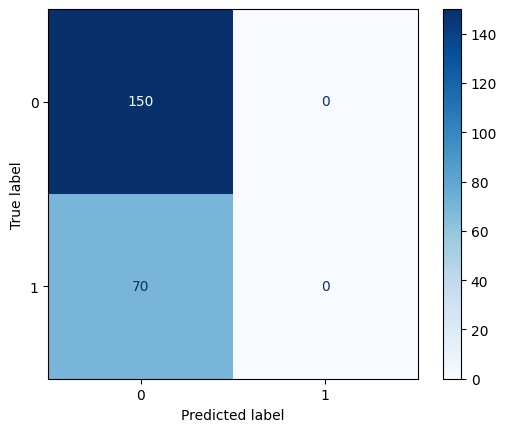

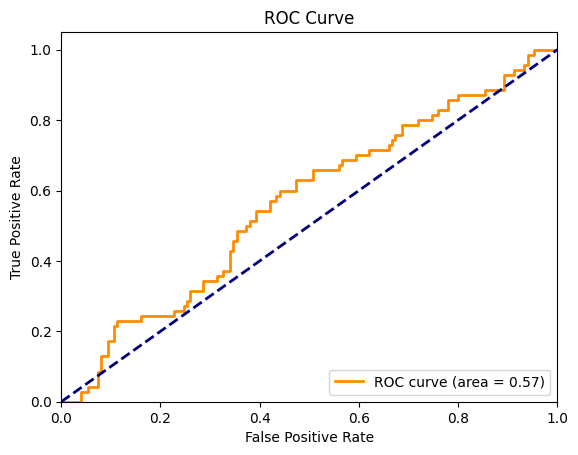

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

# 혼동행렬 그리기
y_pred = pic_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# AUC 점수 계산
y_scores = pic_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

근데 사실 이건 지금 모형이 모든 값을 0으로 예측하고 있어서 나오는 정확도 값입니다. test data의 68.18%가 0이고 나머지가 1인데 모두 0으로 예측을 하니 이런 결과가 나오는 거죠.

AUC score도 약 0.565인데, 완전히 random으로 0과 1을 고르는 모형의 score가 0.5이므로 찍는 것보다 살짝 나은 수준입니다. 모형을 개선할 필요가 있겠군요...

그래서 7차원인 감정값 말고, 4096차원인 사진의 임베딩 벡터값을 이용해 예측하는 시도를 해 보겠습니다. 모형도 logistic regression 말고 딥러닝을 사용해봅시다.

# 감정값 말고 사진 자체의 임베딩 벡터값으로 예측하기

In [ ]:
# 각 사진을 4096차원 벡터로 만들고 이를 DataFrame으로 합침
X_embed = []
os.chdir("/content/drive/MyDrive/window_dragon/crawling_final")
for pic in tqdm(pic_list):
  X_embed.append(DeepFace.represent(pic, enforce_detection=False)[0]["embedding"])


  0%|          | 0/731 [00:00<?, ?it/s]

In [ ]:
X_embed = pd.DataFrame(X_embed)
os.chdir("/content/drive/MyDrive/window_dragon")
X_embed.to_csv("X_embed.csv", index=False)

In [15]:
# 불러올 땐 이걸 사용하기
os.chdir("/content/drive/MyDrive/window_dragon")
X_embed = pd.read_csv('X_embed.csv')
X_embed

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,0.0,0.0,0.0,0.0,0.0,0.050186,0.0,0.0,0.0,0.003529,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 특성이 너무 많이 Logistic Regression으론 잘 안될 겁니다.
X_train, X_test, y_train, y_test = train_test_split(X_embed, y_pics, test_size=0.3, random_state=0, stratify=y_pics)
pic_lr = LogisticRegression(random_state=0).fit(X_train, y_train) # 모형을 훈련합니다.
accuracy = pic_lr.score(X_test, y_test) # 모형을 평가합니다. return 값은 정확도입니다. (0~1 사이)
print(accuracy)

0.7181818181818181


In [17]:
# 딥러닝을 사용해볼까요
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. 모델 정의. Dropout은 오버피팅을 막기위한 용도.
model = Sequential()
model.add(Dense(512, input_dim=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 4. 모델 학습
model.fit(X_train, y_train, epochs=20, batch_size=32)

# 5. 모델 평가 및 예측

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/20
16/16 [==============================] - 5s 6ms/step - loss: 0.6413 - accuracy: 0.6614
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5864 - accuracy: 0.6771
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5205 - accuracy: 0.6947
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.7339
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.7984
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.8650
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8552
Epoch 8/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.8728
Epoch 9/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.9002
Epoch 10/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.9276
Epoch 11/20
16/16 [

확실히 아까보다는 accuracy가 높아진 모습을 볼 수 있습니다. 하지만 혼동행렬도 그려보고 AUC점수도 확인해 봐야겠죠.


7/7 [==============================] - 0s 3ms/step


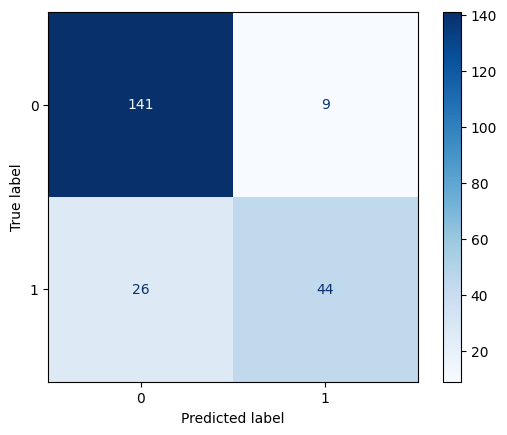

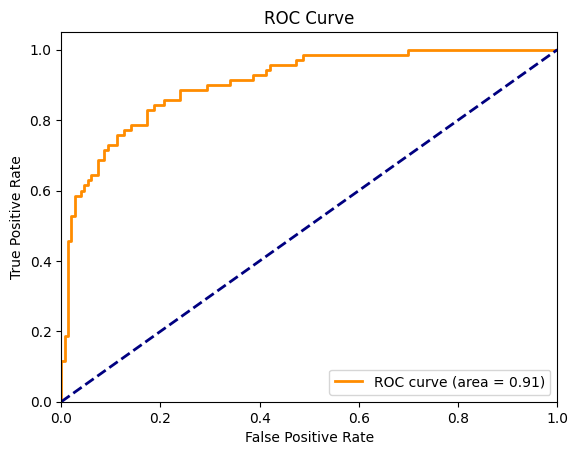

In [37]:
import seaborn as sns
import numpy as np

# 혼동행렬
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int")
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ROC곡선, AUC점수
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

혼동행렬을 확인했을 때 0 말고 1로도 예측을 해, true label이 1일 때 정확하게 판단하는 경우가 크게 증가했음을 볼 수 있습니다.

AUC 점수도 0.91로 증가했네요.